In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

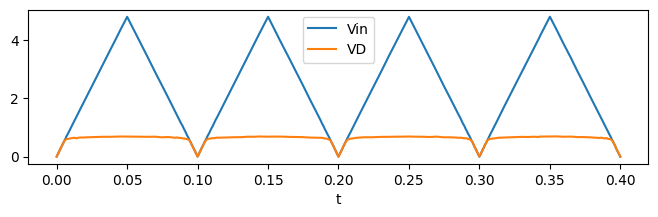

In [ ]:
df = pd.read_csv("curva_diodo_comun.txt", sep='\t', names=["t","Vin","VD"], skiprows=1)

# agrego ruido para darle realismo
mean = 0
std_dev = 0.005

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["Vin"]= df["Vin"] + ruido

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["VD"]= df["VD"] + ruido

df.plot( x='t', y=["Vin","VD"],figsize=(8,2) )

#df.to_csv("diodo_silicio.csv", index=False)


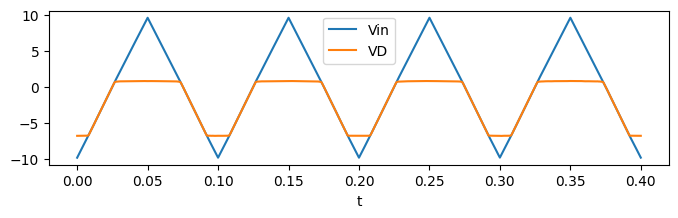

In [3]:
df = pd.read_csv("curva_diodo_zenner.txt", sep='\t', names=["t","Vin","VD"], skiprows=1)

# agrego ruido para darle realismo
mean = 0
std_dev = 0.005

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["Vin"]= df["Vin"] + ruido

ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df["Vin"]))
df["VD"]= df["VD"] + ruido

df.plot( x='t', y=["Vin","VD"],figsize=(8,2) )

df.to_csv("diodo_zenner.csv", index=False)
